In [1]:
%run C:\Users\HSS\dd.py

## 1. 최적화 문제

\begin{align}
x^{\ast} = \arg \min_x f(x) 
\tag{5.1.2}
\end{align}

#### Q1. *최적화. 그냥 그래프로 해결하면 되는 것 아닐까?*

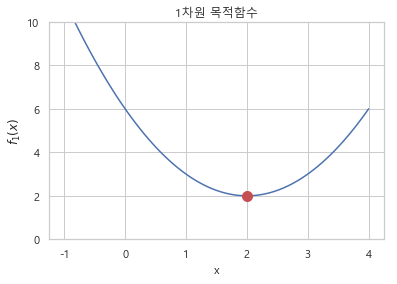

In [2]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

- 이렇게 함수의 그래프를 그려 최소를 판단하는 것과 같이 간단한 문제처럼 보이지만
- 컴퓨터로 그래프를 그린다는 것은 상당한 노가다 작업이고,
- 차원이 3만 넘어가도 시각화는 불가능하다. (물론 연산량도 급격히 늘어난다)

### 로젠브룩 함수
\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\tag{5.1.3}
\end{align}

In [3]:
def f2(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

xx = np.linspace(-4,4,800)
yy = np.linspace(-3,3,600)
#xx,yy의 grid를 만든다. 벡터평면를 만든다고 봐도 무방
X,Y = np.meshgrid(xx,yy)
#X,Y가 만든 모든 좌표평면에서의 함수값 
Z = f2(X,Y)

levels=np.logspace(-1, 3, 10)

- contourf 는 등고를 색으로 표현해주고 contour는 선으로만 표시하는 것 같다.
- level 은 특정 높이에서의 등고를 반환하는듯

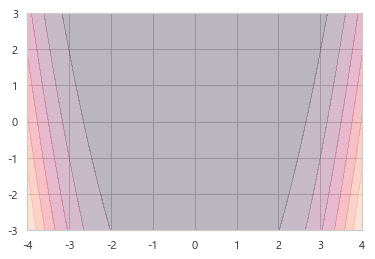

In [4]:
plt.contourf(X,Y,Z, alpha = 0.3, #level = levels 
            )

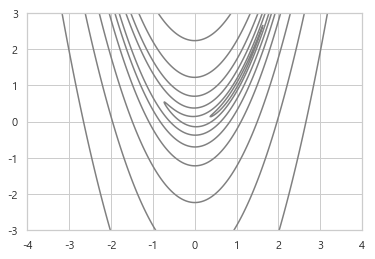

In [5]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])

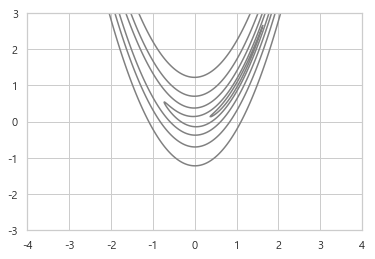

In [6]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150])

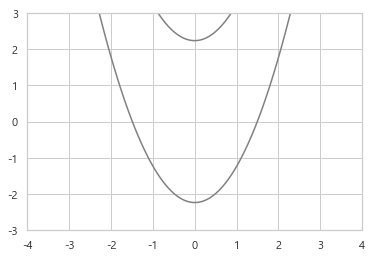

In [7]:
plt.contour(X, Y, Z, colors="gray",
            levels=[500])

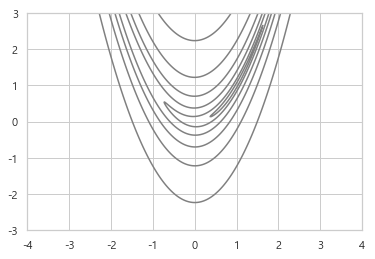

In [8]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500])

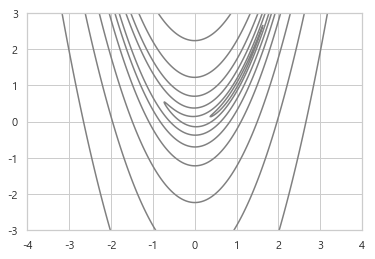

In [9]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])

## 수치적 최적화

- 두가지 문제를 해결해야 한다.
    - 현재 위치가 최적인가?
        - 지금의 위치가 최적인가 아닌가의 필요조건은 `g = 0`이다.
        - `g = 0`인 모든 점이 최적점진 않지만, 최적점들은 모두 `g = 0`을 만족하는 점들이다.
    - 다음 점은 어디로 갈 것인가?
        - 일차 도함수값을 사용하는 경우
        - \begin{align}
            x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
            \tag{5.1.11}
            \end{align}
        
        - 최적화는 이동 방향과 이동 거리(스텝)을 동시에 해결해야 하는데, 일차 도함수값을 사용한다면 항상 옳은 방향으로 이동한다. 그러나 $\mu g(x_k)$인 스텝을 찾아줘야 하는 문제가 있다.
        - 이차 도함수값을 사용하는 뉴턴 방법의 경우
            \begin{align}
            {x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
            \tag{5.1.12}
            \end{align}
         - 이 방법은 목적함수를 2차함수라는 가정하에 한번에 최적점을 찾는다.
         - 그러나 변곡점 부분에서 $[{H}f({x}_n)]^{-1}$이 무한대 혹은 매우 큰 값을 갖기 때문에 불안정한 움직임을 보인다.

### Gradient Descent 를 사용한 최적화

\begin{align}
\text 목적함수 = (x-2)^2 +2
\end{align}

In [10]:
def f1d(x):
    '''f1(x)의 도함수'''
    return 2*(x-2.0)

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_1 = 1.60, g_1 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16
4차 시도: x_3 = 1.98, g_3 = -0.03
5차 시도: x_3 = 2.00, g_3 = -0.01


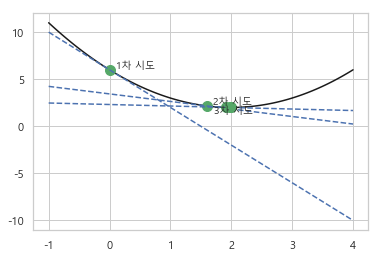

In [11]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')
# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

#k = 1
x = x - mu*f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

# k = 3
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
# plt.text(x - 0.2, f1(x) - 0.7, "4차 시도")
# plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("4차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

# k = 4
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
# plt.text(x - 0.2, f1(x) - 0.7, "5차 시도")
# plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("5차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.show()


#### 최적점 근처에서는 loss가 줄어드는 폭이 급감한다. 속도가 너무 느리다면 mu를 적절히 조절하면 괜찮지만 mu의 적절한 조절은 어려운 문제이다.

#### mu가 너무 크다면 벌어지는 현상은 다음과 같다. loss가 진동하거나 최적점이 예상치 못한 구간으로 튀어버린다.

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 4.40, g_2 = 4.80
3차 시도: x_3 = -0.88, g_3 = -5.76


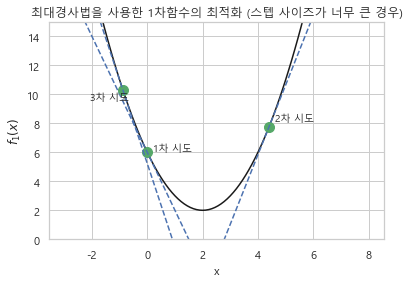

In [12]:
xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size (너무 큰 값!)
mu = 1.1

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.ylim(0, 15)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화 (스텝 사이즈가 너무 큰 경우)")
plt.show()

### 로센브룩 함수의 도함수를 구하고 이를 활용해 뉴튼 방법을 사용하자.
\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\tag{5.1.3}
\end{align}


In [13]:
def f2d(x,y):
    return np.array((2*(x-1) - 400*x*(y-x**2), 200*(y-x**2)))


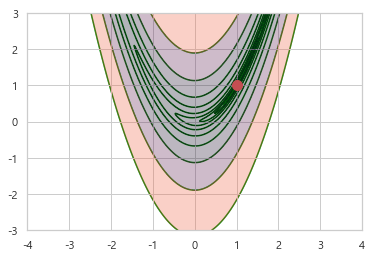

In [14]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.3, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)


mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1


#### $x = 1$  $y=-1$ 에서 최적점을 찾아가는 과정을 그려보아라

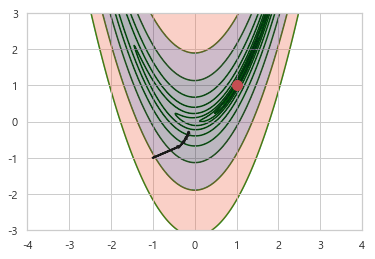

In [20]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.3, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)


mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1




for i in range(5):
    g = f2d(x,y)
    plt.arrow(x,y, -s * mu * g[0], -s * mu * g[1],
             head_width = 0.04, head_length = 0.04, fc = 'k', ec = 'k', lw = 2)
    x,y = x - mu* g[0], y - mu * g[1]

#### 최적화의 결과는 시작점과 스텝 사이즈에 의해 크게 달라진다. 계곡에 빠지는 경우 진동현상이 발생한다 (oscillation) 이 때 최적점 수렴까지의 시간이 오래 걸릴 수 있다.

In [ ]:
-s

In [ ]:
np.exp(-x)

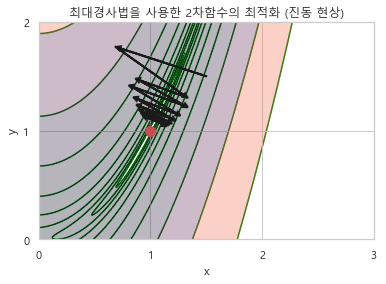

In [27]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.3, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)


mu = 1.8e-3  # step size
s = 0.95  # for arrowhead drawing

x, y = 1.5, 1.5




for i in range(15):
    g = f2d(x,y)
    plt.arrow(x,y, -s * mu * g[0], -s * mu * g[1],
             head_width = 0.04, head_length = 0.04, fc = 'k', ec = 'k', lw = 2)
    x,y = x - mu* g[0], y - mu * g[1]
    
    
### 진동 부분 확대

plt.xlim(0, 3)
plt.ylim(0, 2)

## 눈금 설정
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))

plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.show()

#### 이러한 진동 현상을 없앨 수 있는 방법으로는 2차 도함수, 즉 헤시안 행렬을 이용하는 방법이나 모멘텀 방법(momentum)이 있다. 모멘텀 방법은 진행 방향으로 계속 진행하도록 성분(모멘텀)을 추가하는 것이다. 일반적인 경우에는 2차 도함수를 이용하는 방법을 사용하고 2차 도함수를 계산하기 어려운 인공신경망 등에서는 모멘텀 방법을 선호한다.

### 2차 도함수를 사용한 뉴턴 방법

\begin{align}
{x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
\tag{5.1.12}
\end{align}

- 장점 : 스텝사이즈를 지정해줄 필요가 없고 목적함수가 실제 2차함수와 비슷한 모양일 경우 수렴 속도 빠름

- 단점 : 자코비안과 해시안을 구해야하고, 변곡점 부근에서 불안정함

### scipy로 최적화하기

`sp.optimize.minimize(func, x0, jac)`
 - #### 결과값은 다음과 같은 속성을 갖는다.

    - `x`: 최적화 해
    - `success`: 최적화에 성공하면 True 반환
    - `status`: 종료 상태. 최적화에 성공하면 0 반환
    - `message`: 메시지 문자열
    - `fun`: x 위치에서의 함수의 값
    - `jac`: x 위치에서의 자코비안(그레디언트) 벡터의 값
    - `hess_inv`: x 위치에서의 헤시안 행렬의 역행렬의 값
    - `nfev`: 목적함수 호출 횟수
    - `njev`: 자코비안 계산 횟수
    - `nhev`: 헤시안 계산 횟수
    - `nit`: x 이동 횟수


In [29]:
def f1(x):
    return (x - 2) ** 2 + 2

x0 = 0  # 초깃값
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [30]:
#도함수 하나 줌
def f2(x):
    return 2*(x-2)

x0 = 0  # 초깃값
result = sp.optimize.minimize(f1, x0, jac = f2)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


In [32]:
# 로젠브룩함수에 대해 진행 : 결과 Fail
def f2(x):
    return (1 - x[0])**2 + 100.0 * (x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 5.206971267306648e-12
 hess_inv: array([[0.49938682, 0.99860988],
       [0.99860988, 2.00187644]])
      jac: array([ 7.32229610e-05, -3.35931525e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 656
      nit: 55
     njev: 161
   status: 2
  success: False
        x: array([0.99999854, 0.99999691])


In [46]:
x0 = (0, -2)
result = sp.optimize.minimize(f2, x0, jac = f2d)
print(result)

      fun: 2.2757967340618873e-14
 hess_inv: array([[0.50014426, 0.99998965],
       [0.99998965, 2.00437663]])
      jac: array([ 5.99510921e-06, -3.00878176e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 28
     njev: 36
   status: 0
  success: True
        x: array([0.99999999, 0.99999996])


In [44]:
def f2d(x):
    return np.array((2*(x[0]-1) - 400*x[0]*(x[1]-x[0]**2), 200*(x[1]-x[0]**2)))

f2d((1,1))

array([0, 0])

In [45]:
x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0, jac = f2d)
print(result)

      fun: 1.1558681095145402e-16
 hess_inv: array([[0.49933673, 0.9987295 ],
       [0.9987295 , 2.00252737]])
      jac: array([ 4.30579052e-07, -2.14795293e-07])
  message: 'Optimization terminated successfully.'
     nfev: 73
      nit: 56
     njev: 73
   status: 0
  success: True
        x: array([1., 1.])


### 조건이 있는 최적화

\begin{align}
x_1^2 + x_2^2 = 1 
\tag{5.2.17}
\end{align}

\begin{align}
f(x) = x_1 + x_2  
\tag{5.2.18}
\end{align}

In [56]:
sp.optimize.fmin_slsqp()

TypeError: fmin_slsqp() missing 2 required positional arguments: 'func' and 'x0'

In [58]:
def func1(x):
    return x[0]**2 + x[1]**2

def func2(x):
    return x[0] + x[1] - 1


In [60]:
sp.optimize.fmin_slsqp(func1, x0 = np.array([1,1]), eqcons = ([func2]))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5000000000000002
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([0.5, 0.5])

In [67]:
def ieq_constraint(x):
    k = 1
    return np.atleast_1d(k - np.sum(np.abs(x)))

In [68]:
ieq_constraint(np.array([1,1]))

array([-1])

In [83]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

# 제한 조건 상수
k = 1
def ieq_constraint(x):
    return np.atleast_1d(k - np.sum(np.abs(x)))


sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.605551280732028
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([9.99999981e-01, 1.89941792e-08])

In [88]:
#scipy.optimize.linprog(c, A, b)
A = np.array([[-1,0],[0,-1],[1,2],[4,5]])
b = np.array([-100, -100, 500, 9800])
c = np.array([-3,-5])

In [89]:
sp.optimize.linprog(c, A, b)

     fun: -1400.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 200., 8100.,    0.,    0.])
  status: 0
 success: True
       x: array([300., 100.])

In [4]:
import cvxpy as cp

# 변수의 정의
a = cp.Variable()  # A의 생산량
b = cp.Variable()  # B의 생산량

# 조건의 정의
constraints = [
    a >= 100,  # A를 100개 이상 생산해야 한다.
    b >= 100,  # B를 100개 이상 생산해야 한다. 
    a + 2 * b <= 500, # 500시간 내에 생산해야 한다.
    4 * a + 5 * b <= 9800,  # 부품이 9800개 밖에 없다.
]

# 문제의 정의
obj = cp.Maximize(3 * a + 5 * b)
prob = cp.Problem(obj, constraints)

# 계산
prob.solve() 

# 결과
print("상태:", prob.status)
print("최적값:", a.value, b.value)

ImportError: No module named 'cvxpy'